In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
separator = ";"
csv_filename = 'DBL.csv'

# 'GephiMatrix_author_similarity.csv', 'GephiMatrix_co-authorship.csv', 'GephiMatrix_co-citation.csv'

In [3]:
g=nx.Graph()

In [4]:
# removes quotation marks at the end and start of each line (if necessary)

with open(csv_filename, 'r') as r, open('NLD_01.csv', 'w') as w:    
    for num, line in enumerate(r):
        if num >= 0:            
            if line[0] == "\"" and line[-1] == "\"":
                newline = line[1:-1]
            elif line[0] == "\"" and line[-1] == "\n" and line[-2] == "\"":
                newline = line[1:-2] + "\n"
            else:
                newline = line
        else:
            newline = line               
        w.write(newline)

In [5]:
# removes the first coma at the beginning of each line (if necessary)

with open('NLD_01.csv', 'r') as r, open('NLD_02.csv', 'w') as w:    
    for num, line in enumerate(r):
        if num >= 0:            
            if line[0] == separator:
                newline = line[1:]
            else:
                newline = line
        else:
            newline = line               
        w.write(newline)

In [6]:
# removes comas at the end of each line (if necessary)

with open('NLD_02.csv', 'r') as r, open('NLD_03.csv', 'w') as w:    
    for num, line in enumerate(r):
        if num >= 0:
            if line[-1] == separator:
                newline = line[:-1]
            elif line[-1] == "\n" and line[-2] == separator:
                newline = line[:-2] + "\n"
            else:
                newline = line
        else:
            newline = line
        w.write(newline)

In [7]:
df = pd.read_csv('NLD_03.csv', sep=separator)     # full csv file with 1053x1053 values

In [8]:
# change the column labels from strings to integers

list_columns = []

for number in range(0, len(df.index.values)):
    list_columns.append(number)
    
df.columns = list_columns
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052
Jim_Thomas,1.000000,0.097384,0.125630,0.109691,0.275405,0.195006,0.196239,0.317986,0.407599,0.0,...,0.158035,0.238107,0.230967,0.117254,0.112948,0.608428,0.050252,0.349612,0.156353,0.000000
Eleftherios_Koutsofios,0.097384,1.000000,0.223607,0.144620,0.281718,0.235008,0.383180,0.365148,0.132508,0.0,...,0.343792,0.243184,0.052705,0.298142,0.264931,0.116445,0.000000,0.181084,0.222246,0.298142
Lawrence_A._Rowe,0.125630,0.223607,1.000000,0.242536,0.094491,0.181902,0.123579,0.255155,0.027778,0.0,...,0.131036,0.302167,0.058926,0.291667,0.392031,0.032547,0.000000,0.193255,0.016205,0.000000
Jonathan_I._Helfman,0.109691,0.144620,0.242536,1.000000,0.229175,0.294118,0.173840,0.049507,0.053897,0.0,...,0.050849,0.199626,0.085749,0.323381,0.025355,0.063151,0.485071,0.160701,0.424474,0.000000
Mary_Brewster,0.275405,0.281718,0.094491,0.229175,1.000000,0.297927,0.336302,0.115728,0.356966,0.0,...,0.237729,0.326510,0.222718,0.314970,0.079026,0.295241,0.000000,0.354783,0.220498,0.000000


In [9]:
# change the rows labels/ indexes from strings to integers

df['index'] = list_columns
df.set_index("index", inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052
index,,,,,,,,,,,,,,,,,,,,,
0,1.000000,0.097384,0.125630,0.109691,0.275405,0.195006,0.196239,0.317986,0.407599,0.0,...,0.158035,0.238107,0.230967,0.117254,0.112948,0.608428,0.050252,0.349612,0.156353,0.000000
1,0.097384,1.000000,0.223607,0.144620,0.281718,0.235008,0.383180,0.365148,0.132508,0.0,...,0.343792,0.243184,0.052705,0.298142,0.264931,0.116445,0.000000,0.181084,0.222246,0.298142
2,0.125630,0.223607,1.000000,0.242536,0.094491,0.181902,0.123579,0.255155,0.027778,0.0,...,0.131036,0.302167,0.058926,0.291667,0.392031,0.032547,0.000000,0.193255,0.016205,0.000000
3,0.109691,0.144620,0.242536,1.000000,0.229175,0.294118,0.173840,0.049507,0.053897,0.0,...,0.050849,0.199626,0.085749,0.323381,0.025355,0.063151,0.485071,0.160701,0.424474,0.000000
4,0.275405,0.281718,0.094491,0.229175,1.000000,0.297927,0.336302,0.115728,0.356966,0.0,...,0.237729,0.326510,0.222718,0.314970,0.079026,0.295241,0.000000,0.354783,0.220498,0.000000


In [10]:
# 

df_ex = df.loc[0:24, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]]

df_ex

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
index,,,,,,,,,,,,,,,,,,,,,
0,1.000000,0.097384,0.125630,0.109691,0.275405,0.195006,0.196239,0.317986,0.407599,0.0,...,0.139374,0.213497,0.362278,0.355599,0.189934,0.541307,0.416076,0.266501,0.288039,0.150599
1,0.097384,1.000000,0.223607,0.144620,0.281718,0.235008,0.383180,0.365148,0.132508,0.0,...,0.248069,0.066667,0.158761,0.168034,0.056344,0.081650,0.359064,0.421637,0.165380,0.244991
2,0.125630,0.223607,1.000000,0.242536,0.094491,0.181902,0.123579,0.255155,0.027778,0.0,...,0.346688,0.111803,0.184327,0.219179,0.000000,0.045644,0.188177,0.265165,0.231125,0.096674
3,0.109691,0.144620,0.242536,1.000000,0.229175,0.294118,0.173840,0.049507,0.053897,0.0,...,0.201802,0.433861,0.357647,0.243011,0.000000,0.088561,0.109535,0.128624,0.336336,0.140681
4,0.275405,0.281718,0.094491,0.229175,1.000000,0.297927,0.336302,0.115728,0.356966,0.0,...,0.157243,0.169031,0.356087,0.142014,0.142857,0.241523,0.234711,0.167038,0.122300,0.420201


In [11]:
# 

weights = []

for row in df_ex.index.values:
    for column in df_ex.index.values:
        if  (row < column) and (df_ex[row][column] > 0) and (df_ex[row][column] < 1):
            g.add_edge(row,column, weight=df_ex[row][column])
            weights.append(df_ex[row][column])

In [12]:
len(weights), g.number_of_edges()

(275, 275)

C:\Users\Evgeni\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Evgeni\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\Evgeni\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Evgeni\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be remove

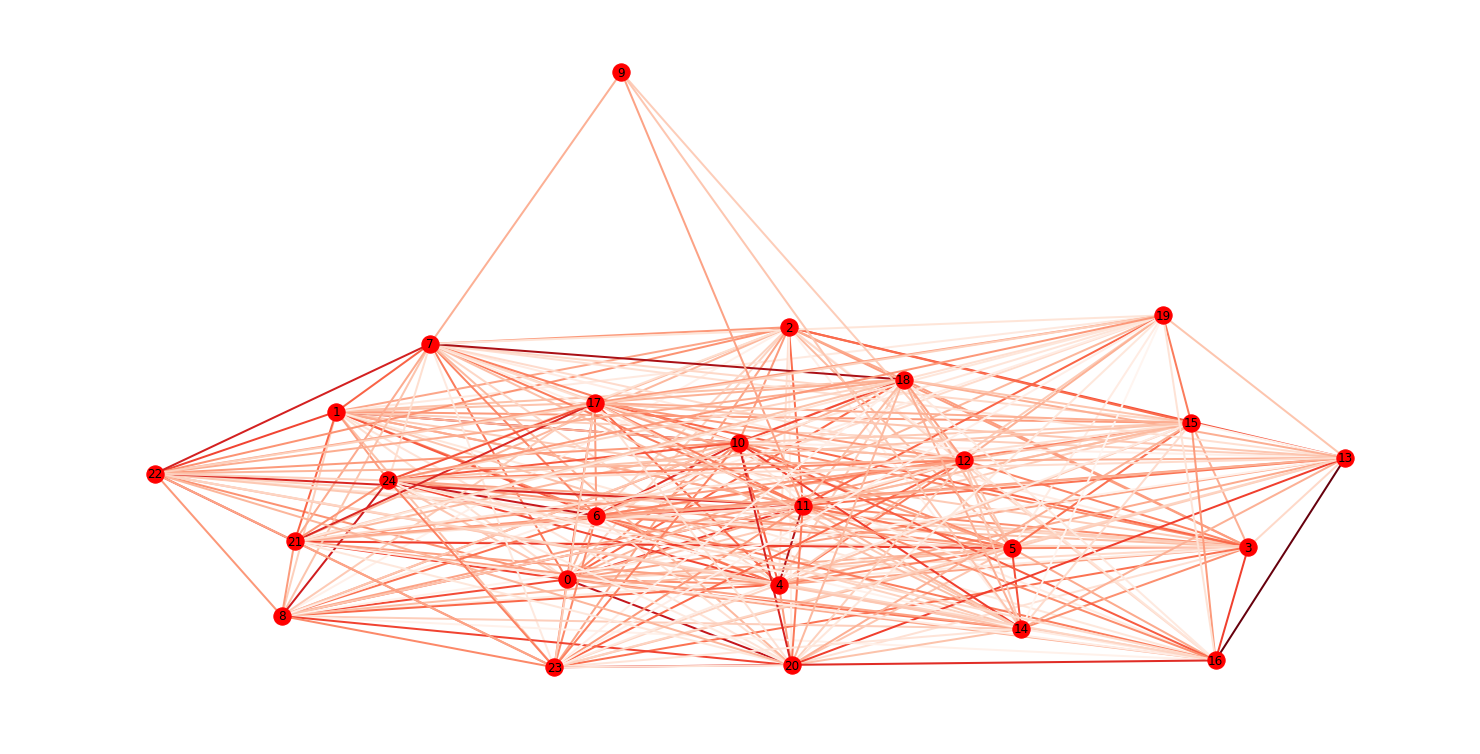

In [13]:
plt.figure(figsize=(20,10))

pos = nx.spring_layout(g)
#nx.draw(g, with_labels=False, pos, node_color='b', node_size=20, arrowstyle='->', arrowsize=20, font_size=10, font_weight="bold", edgelist=g.edges(), edge_color=weights, width=10.0, edge_cmap=plt.cm.Blues)
nx.draw(g, pos, node_color='red', edgelist=g.edges(), edge_color=weights, arrowsize=20, with_labels=True, nodesize=10, width=2.0, edge_cmap=plt.cm.Reds)

plt.savefig('NLD.png')
plt.show()